In [39]:
import tensorflow as tf

In [3]:
import cv2
import numpy as np
import os

In [4]:
import pathlib as path
data_dir = path.Path('./Data')

In [5]:
data_dir

WindowsPath('Data')

In [6]:
file_list = list(data_dir.glob('*/*.jpg'))
len(file_list)

382

In [7]:
file_list[0]

WindowsPath('Data/eight/20250302_145059.jpg')

In [8]:
img = cv2.imread(str('Data/eight/20250302_145059.jpg'))

In [9]:
cv2.imshow("Frame",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
def readImage(fileName) -> None:
    image = fileName
    if not isinstance(image, np.ndarray):
        image = cv2.imread(str(image))
    cv2.imshow("Frame", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [11]:
readImage(file_list[36])

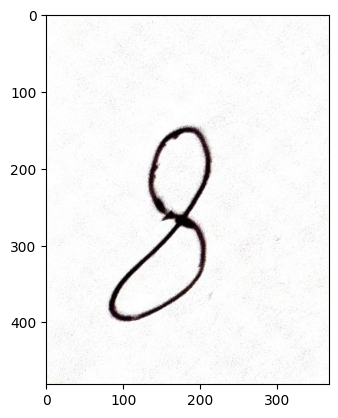

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [13]:
def num_of_images(a)->int:
    num = list(data_dir.glob(f'{a}/*.jpg')) 
    return len(num)

In [14]:
lis = list(data_dir.glob("*"))

In [15]:
lis[0]

WindowsPath('Data/eight')

In [16]:
classes = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [17]:
for num in classes:
    print(f"{num}: {num_of_images(num)}")

zero: 35
one: 42
two: 35
three: 39
four: 35
five: 42
six: 35
seven: 42
eight: 35
nine: 42


In [18]:
newDataDir = 'Augmented_Data'

In [19]:
if not os.path.exists(newDataDir):
    os.mkdir(newDataDir)

In [20]:
def clustringImages(classes)->dict:
    imgDict = {}
    for num in classes:
        class_num = list(data_dir.glob(f'{num}/*.jpg'))
        imgDict[num] = class_num
    return imgDict

In [21]:
imgDict = clustringImages(classes)

In [22]:
for key in imgDict:
    print(f"{key}: {len(imgDict[key])}")

zero: 35
one: 42
two: 35
three: 39
four: 35
five: 42
six: 35
seven: 42
eight: 35
nine: 42


In [23]:
oneList = imgDict['one']

In [24]:
readImage(oneList[1])

In [25]:
str(oneList[0]).split("\\")[2]

'20250302_152230.jpg'

In [26]:
cv2.imread(imgDict['three'][20]).shape

(1652, 1508, 3)

In [27]:
def convertToArray(imgDict:dict)->list:
    x,y = [],[]
    for key in imgDict:
        imgList = imgDict[key]

        for img in imgList:
            new_img = cv2.imread(img)
            if new_img is None:
                print(f"Unable to read Images")

            x.append(new_img)
            y.append(key)
    return x,y

In [28]:
x,y = convertToArray(imgDict)

In [29]:
readImage(x[155])

In [30]:
x = np.array(x)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (382,) + inhomogeneous part.

In [31]:
x = np.array(x, dtype=object)

In [32]:
x.shape

(382,)

In [33]:
from tensorflow import keras
import random

In [34]:
def random_rotation_method(expanded_img):
    zoom_value = random.uniform(-0.5,0.5)
    random_zoom = tf.keras.layers.RandomZoom(zoom_value)

    new_img = random_zoom(expanded_img)
    return new_img

In [35]:
img = x[0]
readImage(img)

In [114]:
def random_contrast_method(expanded_img):
    # expanded_img = tf.cast(expanded_img, tf.float32) / 255.0
    contrast_value = random.uniform(0.3,0.9)
    # random_contrast = tf.keras.layers.RandomContrast(factor=0.8)
    # new_img = random_contrast(expanded_img)
    new_img = tf.image.adjust_contrast(expanded_img, contrast_value)
    # new_img = tf.clip_by_value(new_img,0,0.9)
    # new_img = (new_img*255).numpy().astype('uint8')
    return new_img

In [81]:
expand_img = tf.expand_dims(img, axis=0)
augmented_img = random_contrast_method(expand_img)
augmented_img = tf.squeeze(augmented_img,axis=0)
augmented_img = tf.clip_by_value(augmented_img,0,255).numpy().astype('uint8')

In [84]:
readImage(augmented_img)

In [85]:
# def random_brightness_method(expanded_img):
def random_brightness_method(img):
    # Adjust brightness by a random factor between -0.1 and 0.1 (you can adjust this range)
    brightness_delta = random.uniform(-0.1, 0.1)
    augmented_img = tf.image.adjust_brightness(img, brightness_delta)
    return augmented_img

In [86]:
def random_crop_method(expanded_img):
    height = random.randint(0,175)
    width = random.randint(0,175)
    random_crop = tf.keras.layers.RandomCrop(height,width)

    new_img = random_crop(expanded_img)
    return new_img

In [87]:
img = x[0]
img.shape

(467, 370, 3)

In [88]:
readImage(img)

In [89]:
img.shape

(467, 370, 3)

In [90]:
expand_img = tf.expand_dims(img, axis=0)
augmented_img = random_contrast_method(expand_img)
augmented_img = tf.squeeze(augmented_img,axis=0)
augmented_img = tf.clip_by_value(augmented_img,0,255).numpy().astype('uint8')

In [91]:
expand_img.shape

TensorShape([1, 467, 370, 3])

In [92]:
augmented_img.shape

(467, 370, 3)

In [93]:
readImage(augmented_img)

In [115]:
augment_type_list = [random_brightness_method,random_contrast_method,random_rotation_method]

In [108]:
def convertToarray(imgDict:dict,label:str)->list:
    new_x = []
    imgDict = imgDict[label]

    for img in imgDict:
        new_img = cv2.imread(img)
        if new_img is None:
            print(f"Unable to read file: {new_img}")

        new_x.append(new_img)
    return new_x

In [96]:
zero_x = convertToarray(imgDict,'zero')
one_x = convertToarray(imgDict,'one')
two_x = convertToarray(imgDict,'two')
three_x = convertToarray(imgDict,'three')
four_x = convertToarray(imgDict,'four')
five_x = convertToarray(imgDict,'five')
six_x = convertToarray(imgDict,'six')
seven_x = convertToarray(imgDict,'seven')
eight_x = convertToarray(imgDict,'eight')
nine_x = convertToarray(imgDict,'nine')

In [97]:
zero_x = np.array(zero_x,dtype=object)
one_x = np.array(one_x,dtype=object)
two_x = np.array(two_x,dtype=object)
three_x = np.array(three_x,dtype=object)
four_x = np.array(four_x,dtype=object)
five_x = np.array(five_x,dtype=object)
six_x = np.array(six_x,dtype=object)
seven_x = np.array(seven_x,dtype=object)
eight_x = np.array(eight_x,dtype=object)
nine_x = np.array(nine_x,dtype=object)

In [98]:
new_path = os.path.join(newDataDir,classes[0])
new_path

'Augmented_Data\\zero'

In [99]:
if os.path.exists(new_path):
    os.removedirs(new_path)

In [100]:
if not os.path.exists(newDataDir):
    os.mkdir(newDataDir)

In [128]:
def data_augmentation(label, data):
    newDataPath = os.path.join(newDataDir,label)
    if not os.path.exists(newDataPath):
        os.mkdir(newDataPath)
    count = 0
    for img in data:
        if img is not None:
            for i in range(0,15):
                expand_img = tf.expand_dims(img,axis=0)
                # expand_img = tf.cast(expand_img, tf.float32)
                value = random.randint(0,2)
                augmented_img = augment_type_list[value](expand_img)
                augmented_img = tf.squeeze(augmented_img,axis=0)
                augmented_img = tf.clip_by_value(augmented_img,0,255).numpy().astype('float32')

                resized_img = cv2.resize(augmented_img,(64,64))

                cv2.imwrite(os.path.join(newDataPath,"{}.jpg".format(count)),resized_img)

                count += 1

In [129]:
data_augmentation(classes[0],zero_x)

In [130]:
data_augmentation(classes[1],one_x)

In [131]:
data_augmentation(classes[2],two_x)

In [132]:
data_augmentation(classes[3],three_x)

In [133]:
data_augmentation(classes[4],four_x)

In [134]:
data_augmentation(classes[5],five_x)

In [135]:
data_augmentation(classes[6],six_x)

In [136]:
data_augmentation(classes[7],seven_x)

In [137]:
data_augmentation(classes[8],eight_x)

In [138]:
data_augmentation(classes[9],nine_x)